<b>IMPORTING THE PACKAGES</b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date

<b>READING THE FILE AND PRINTING THE TOP 5 ROWS OF THE DATASET</b>

In [113]:
covidData = pd.read_csv('RawData.csv')
covidData.head()

C:\Users\Himank Khandelwal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Entry_ID,State Patient Number,Date_Announced,Age_Bracket,Gender,Detected_City,Detected_District,Detected_State,State_code,Num_Cases,Current_Status,Contracted from which Patient (Suspected),Notes,Source_1,Source_2,Source_3,Nationality,Type of transmission,Status Change Date,Patient Number
0,43275,NaN,01/06/2020,NaN,NaN,NaN,Unassigned,State Unassigned,UN,139,Hospitalized,NaN,NaN,mohfw.gov.in,NaN,NaN,NaN,NaN,NaN,72200.0
1,43276,NaN,01/06/2020,NaN,NaN,NaN,Raigarh,Chhattisgarh,CT,2,Hospitalized,NaN,NaN,https://twitter.com/HealthCgGov/status/1267299...,NaN,NaN,NaN,NaN,NaN,72201.0
2,43277,NaN,01/06/2020,NaN,NaN,NaN,Durg,Chhattisgarh,CT,1,Hospitalized,NaN,NaN,https://twitter.com/HealthCgGov/status/1267299...,NaN,NaN,NaN,NaN,NaN,72202.0
3,43278,NaN,01/06/2020,NaN,NaN,NaN,Rajnandgaon,Chhattisgarh,CT,1,Hospitalized,NaN,NaN,https://twitter.com/HealthCgGov/status/1267299...,NaN,NaN,NaN,NaN,NaN,72203.0
4,43279,NaN,01/06/2020,NaN,NaN,NaN,Mahasamund,Chhattisgarh,CT,1,Hospitalized,NaN,NaN,https://twitter.com/HealthCgGov/status/1267299...,NaN,NaN,NaN,NaN,NaN,72204.0


<b>SHAPE OF THE DATASET</b>

In [3]:
covidData.shape

(51582, 20)

<b>NAME OF THE COLUMNS IN THE DATASET</b>

In [4]:
covidData.columns

Index(['Entry_ID', 'State Patient Number', 'Date_Announced', 'Age_Bracket',
       'Gender', 'Detected_City', 'Detected_District', 'Detected_State',
       'State_code', 'Num_Cases', 'Current_Status',
       'Contracted from which Patient (Suspected)', 'Notes', 'Source_1',
       'Source_2', 'Source_3', 'Nationality', 'Type of transmission',
       'Status Change Date', 'Patient Number'],
      dtype='object')

<b>CONVERTING Date_Announced FIELD TO DATETIME OBJECT</b>

In [5]:
covidData['Date_Announced']=pd.to_datetime(covidData.Date_Announced)

<b>USE OF INFO FUNCTION</b>

In [6]:
covidData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51582 entries, 0 to 51581
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Entry_ID                                   51582 non-null  int64         
 1   State Patient Number                       18998 non-null  object        
 2   Date_Announced                             51582 non-null  datetime64[ns]
 3   Age_Bracket                                18548 non-null  object        
 4   Gender                                     18600 non-null  object        
 5   Detected_City                              5405 non-null   object        
 6   Detected_District                          50854 non-null  object        
 7   Detected_State                             51581 non-null  object        
 8   State_code                                 51581 non-null  object        
 9   Num_Cases        

<b>ONLY KEEPING THE RELEVANT COLUMNS IN THE DATASET</b>

In [7]:
covidData = covidData[['Entry_ID','Date_Announced','Detected_District','Detected_State','Num_Cases','Current_Status']]

In [8]:
covidData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51582 entries, 0 to 51581
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Entry_ID           51582 non-null  int64         
 1   Date_Announced     51582 non-null  datetime64[ns]
 2   Detected_District  50854 non-null  object        
 3   Detected_State     51581 non-null  object        
 4   Num_Cases          51582 non-null  int64         
 5   Current_Status     51582 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 2.4+ MB


<b>GETTING THE DATA OF THE MAHARASHTRA<\b>

In [9]:
covidData_MH =  covidData[covidData['Detected_State'] == 'Maharashtra']
covidData_MH.Detected_State.unique()
print(covidData_MH.shape)
covidData_MH.head()

(2167, 6)


,Entry_ID,Date_Announced,Detected_District,Detected_State,Num_Cases,Current_Status
739,44021,2020-01-06,Akola,Maharashtra,7,Recovered
740,44022,2020-01-06,Aurangabad,Maharashtra,26,Recovered
741,44023,2020-01-06,Beed,Maharashtra,13,Recovered
742,44024,2020-01-06,Chandrapur,Maharashtra,2,Recovered
743,44025,2020-01-06,Dhule,Maharashtra,2,Recovered


<b>IDENTIFYING THE UNIQUE VALUES IN Detected_District & Current_Status</b>

In [10]:
print(covidData_MH.Detected_District.unique())
#Other State , Unknown , nan values are also there in district
print(len(covidData_MH.Detected_District.unique()))

['Akola' 'Aurangabad' 'Beed' 'Chandrapur' 'Dhule' 'Gadchiroli' 'Gondia'
 'Hingoli' 'Jalgaon' 'Jalna' 'Mumbai' 'Nagpur' 'Nanded' 'Nandurbar'
 'Osmanabad' 'Palghar' 'Pune' 'Raigad' 'Ratnagiri' 'Sangli' 'Satara'
 'Solapur' 'Thane' 'Wardha' 'Nashik' 'Amravati' 'Buldhana' 'Kolhapur'
 'Other State' 'Ahmednagar' 'Parbhani' 'Sindhudurg' 'Yavatmal' 'Latur'
 'Bhandara' 'Washim' nan 'Unknown']
38


In [11]:
a=covidData_MH.groupby('Date_Announced')
a

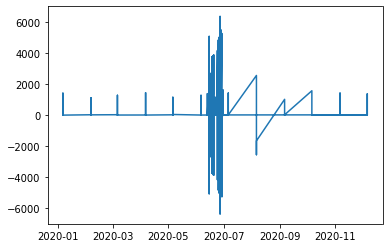

In [12]:
plt.plot('Date_Announced','Num_Cases',data = covidData_MH)
plt.show()

In [13]:
#covidData_MH = covidData_MH.drop('Entry_ID',axis = 1)
covidData_MH.set_index('Date_Announced',inplace = True)

In [14]:
covidData_MH

,Entry_ID,Detected_District,Detected_State,Num_Cases,Current_Status
Date_Announced,,,,,
2020-01-06,44021,Akola,Maharashtra,7,Recovered
2020-01-06,44022,Aurangabad,Maharashtra,26,Recovered
2020-01-06,44023,Beed,Maharashtra,13,Recovered
2020-01-06,44024,Chandrapur,Maharashtra,2,Recovered
2020-01-06,44025,Dhule,Maharashtra,2,Recovered
...,...,...,...,...,...
2020-06-30,94402,Raigad,Maharashtra,7,Deceased
2020-06-30,94403,Ratnagiri,Maharashtra,1,Deceased
2020-06-30,94404,Solapur,Maharashtra,8,Deceased


In [30]:
covidData_MH.index = covidData_MH.index.strftime('%d/%m/%Y')

AttributeError: 'Index' object has no attribute 'strftime'

In [17]:
covidData_MH.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2167 entries, 06/01/2020 to 30/06/2020
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Entry_ID           2167 non-null   int64 
 1   Detected_District  2094 non-null   object
 2   Detected_State     2167 non-null   object
 3   Num_Cases          2167 non-null   int64 
 4   Current_Status     2167 non-null   object
dtypes: int64(2), object(3)
memory usage: 181.6+ KB


In [42]:
data1to13 = covidData_MH["06/01/2020":"06/13/2020"]
data1to13.index = pd.to_datetime(data1to13.index).strftime('%d/%m/%Y')
data1to13.info()
data1to13

<class 'pandas.core.frame.DataFrame'>
Index: 813 entries, 01/06/2020 to 12/06/2020
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Entry_ID           813 non-null    int64 
 1   Detected_District  806 non-null    object
 2   Detected_State     813 non-null    object
 3   Num_Cases          813 non-null    int64 
 4   Current_Status     813 non-null    object
dtypes: int64(2), object(3)
memory usage: 38.1+ KB


,Entry_ID,Detected_District,Detected_State,Num_Cases,Current_Status
Date_Announced,,,,,
01/06/2020,44021,Akola,Maharashtra,7,Recovered
01/06/2020,44022,Aurangabad,Maharashtra,26,Recovered
01/06/2020,44023,Beed,Maharashtra,13,Recovered
01/06/2020,44024,Chandrapur,Maharashtra,2,Recovered
01/06/2020,44025,Dhule,Maharashtra,2,Recovered
...,...,...,...,...,...
12/06/2020,60681,Nashik,Maharashtra,2,Deceased
12/06/2020,60682,Palghar,Maharashtra,1,Deceased
12/06/2020,60683,Pune,Maharashtra,12,Deceased


In [44]:
data13to30 =covidData_MH['13/06/2020':]
data13to30

,Entry_ID,Detected_District,Detected_State,Num_Cases,Current_Status
Date_Announced,,,,,
13/06/2020,62026,Ahmednagar,Maharashtra,9,Hospitalized
13/06/2020,62027,Akola,Maharashtra,11,Hospitalized
13/06/2020,62028,Amravati,Maharashtra,11,Hospitalized
13/06/2020,62029,Aurangabad,Maharashtra,103,Hospitalized
13/06/2020,62030,Beed,Maharashtra,5,Hospitalized
...,...,...,...,...,...
30/06/2020,94402,Raigad,Maharashtra,7,Deceased
30/06/2020,94403,Ratnagiri,Maharashtra,1,Deceased
30/06/2020,94404,Solapur,Maharashtra,8,Deceased


In [54]:
covidData_June_MH = data1to13.append(data13to30)
covidData_June_MH.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2167 entries, 01/06/2020 to 30/06/2020
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Entry_ID           2167 non-null   int64 
 1   Detected_District  2094 non-null   object
 2   Detected_State     2167 non-null   object
 3   Num_Cases          2167 non-null   int64 
 4   Current_Status     2167 non-null   object
dtypes: int64(2), object(3)
memory usage: 101.6+ KB


   Current_Status  Num_Cases
0        Deceased       5569
1    Hospitalized     107106
2  Migrated_Other         15
3  Migrated_other          1
4       Recovered      61582


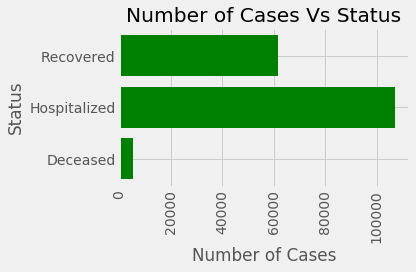

In [240]:
#covidData_June_MH.Num_Cases.plot()
Status_Num = covidData_June_MH.groupby('Current_Status').sum()
#Status_Num.drop('Entry_ID',axis = 1,inplace =True)
Status_Num.reset_index(inplace = True)
print(Status_Num)
Status_Num.drop(Status_Num.index[[2,3]],inplace = True)
plt.barh('Current_Status','Num_Cases',data = Status_Num,color='green')
plt.xticks(rotation=90)
plt.title('Number of Cases Vs Status')
plt.xlabel('Number of Cases')
plt.ylabel('Status')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.savefig('Number of Cases Vs Status')

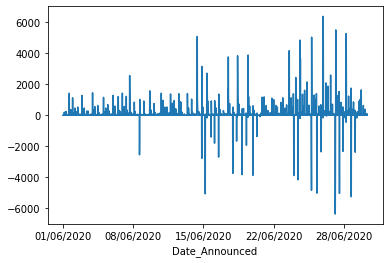

In [116]:
covidData_June_MH['Num_Cases'].plot()

In [118]:
covidData_June_MH.drop('Entry_ID',axis = 1,inplace = True)

In [141]:
covidData_June_MH.head()

,Detected_District,Detected_State,Num_Cases,Current_Status
Date_Announced,,,,
01/06/2020,Akola,Maharashtra,7,Recovered
01/06/2020,Aurangabad,Maharashtra,26,Recovered
01/06/2020,Beed,Maharashtra,13,Recovered
01/06/2020,Chandrapur,Maharashtra,2,Recovered
01/06/2020,Dhule,Maharashtra,2,Recovered


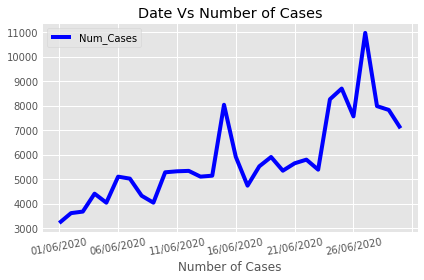

In [234]:
covidData_June_MH.groupby(covidData_June_MH.index).sum().plot(color = 'blue')
plt.xticks(rotation=10)
plt.xlabel('Number of Cases')
plt.xticks()
plt.title('Date Vs Number of Cases')
plt.style.use('ggplot')
plt.savefig('Number_of_Cases_Vs_Date.png')
plt.tight_layout()

In [213]:
pwd

'C:\\Users\\Himank Khandelwal\\Downloads'

C:\Users\Himank Khandelwal\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


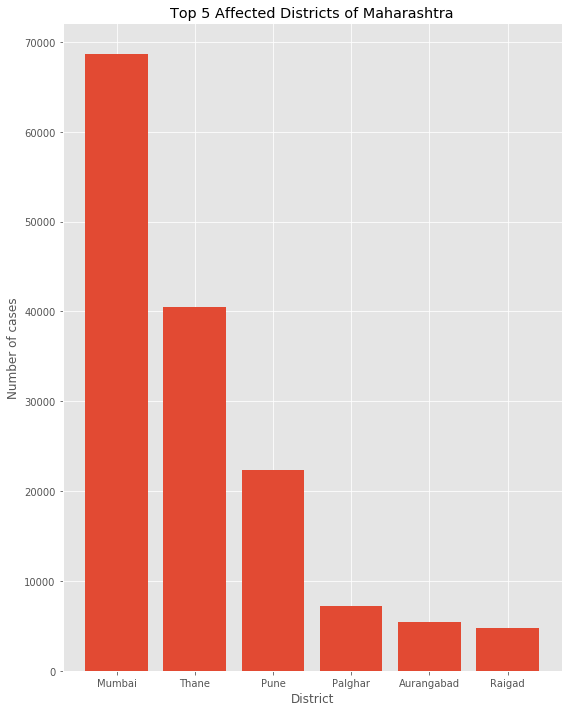

In [214]:
plt.figure(figsize=(8,10))
District_Wise = covidData_June_MH.groupby('Detected_District').sum()
District_Wise.drop('Unknown',inplace = True)
District_Wise.sort_values(['Num_Cases'],ascending = False,inplace = True)
#print(District_Wise)
District_Wise.reset_index(inplace = True)
Top5 = District_Wise[0:6]
Top5.sort_values('Num_Cases',ascending = False,inplace = True)
plt.bar('Detected_District','Num_Cases',data = Top5)
plt.ylabel("Number of cases")
plt.xlabel("District")
plt.title("Top 5 Affected Districts of Maharashtra")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig('Top5Affected.png')